<a href="https://colab.research.google.com/github/AbdallahAl-masri/ML-diabetes_project/blob/main/AI_project_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
path = '/content/drive/My Drive'
os.chdir(path)

import pandas as pd
import numpy as np

diabetes_data = pd.read_csv('diabetes_prediction_dataset.csv')
np.random.seed()

encoded_data = pd.get_dummies(diabetes_data)

# Separate features and target variable
x = encoded_data.drop('diabetes', axis=1)
y = encoded_data['diabetes']

MAES = []
algo = []
accuracy = []
recall = []
fscore = []

Mounted at /content/drive/


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from  sklearn.metrics import accuracy_score , recall_score , f1_score

# Functions for comparing different approaches
def score_dataset_RandomForest(X_train, X_valid, y_train, y_valid, preprocessor):
    model = RandomForestClassifier(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
    ])


    my_pipeline.fit(X_train, y_train)

    preds = my_pipeline.predict(X_valid)
    algo.append('RandomForset')
    MAES.append(mean_absolute_error(y_valid, preds))
    accuracy.append(accuracy_score(preds, y_valid))
    recall.append(recall_score(preds,y_valid))
    fscore.append(f1_score(preds,y_valid))
    return mean_absolute_error(y_valid, preds)



def score_dataet_KNeighborsClassifier(X_train, X_valid, y_train, y_valid, preprocessor):


  model = KNeighborsClassifier(n_neighbors=5)
  model.fit(X_train, y_train)

  # Bundle preprocessing and modeling code in pipeline
  my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
    ])

  # preparing of training data, fit model
  my_pipeline.fit(X_train, y_train)

  # preprocessing of validation data, get predictions
  preds = my_pipeline.predict(X_valid)
  algo.append('K Neighbors')
  MAES.append(mean_absolute_error(y_valid, preds))
  accuracy.append(accuracy_score(preds, y_valid))
  recall.append(recall_score(preds,y_valid))
  fscore.append(f1_score(preds,y_valid))
  return mean_absolute_error(y_valid, preds)


def cross_validation_score(x, y,model):

  # Multiply by -1 since sklearn calculates *negative* MAE
  scores = -1 * cross_val_score(my_pipeline, x, y, cv=5, scoring='neg_mean_absolute_error')
  return scores


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

def NeuralNetwork(X_train_full, X_valid_full, y_train, y_valid, low_cardinality_cols, numerical_cols):
  # Standardize the numeric features
  scaler = StandardScaler()
  X_train_numeric = scaler.fit_transform(X_train_full[numerical_cols])
  X_test_numeric = scaler.transform(X_valid_full[numerical_cols])

  # Encode categorical features using one-hot encoding
  ct = ColumnTransformer(
      [('encoder', OneHotEncoder(), low_cardinality_cols)],
      remainder='passthrough'
  )

  X_train_encoded = ct.fit_transform(X_train_full)
  X_test_encoded = ct.transform(X_valid_full)

  # Combine encoded categorical features with standardized numeric features
  X_train_final = np.concatenate((X_train_encoded, X_train_numeric), axis=1)
  X_test_final = np.concatenate((X_test_encoded, X_test_numeric), axis=1)


  # Build the neural network
  model = keras.Sequential()
  model.add(layers.Dense(16, activation='relu', input_dim=X_train_final.shape[1]))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model
  model.fit(X_train_final, y_train, epochs=10, batch_size=32)

  # Make predictions on the test data
  y_pred = model.predict(X_test_final)
  y_pred = (y_pred >= 0.5).astype(int)

  y_test = np.array(y_valid)

  # Calculate mean absolute error
  mae = mean_absolute_error(y_test, y_pred)
  algo.append('NeuralNeetwork')
  MAES.append(mae)
  accuracy.append(accuracy_score(y_pred, y_test))
  recall.append(recall_score(y_pred, y_test))
  fscore.append(f1_score(y_pred, y_test))
  return mae

In [ ]:
# Split the data into training and testing sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,random_state=0)


# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]


# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


In [ ]:
from sklearn import preprocessing
from pandas.core.arrays import categorical
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# preprocessing for numerical data
numerical_transform = SimpleImputer()

# preprocessing for categorical data
categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transform, numerical_cols),
        ('cat', categorical_transform, low_cardinality_cols)
    ])



In [ ]:
print('MAE from pipeline - RandomForset')
print(score_dataset_RandomForest(X_train, X_valid, y_train, y_valid, preprocessor))
print('\n\nMAE from pipeline - KNeighbors')
print(score_dataet_KNeighborsClassifier(X_train, X_valid, y_train, y_valid, preprocessor))



MAE from pipeline - RandomForset
0.03135


MAE from pipeline - KNeighbors
0.0437


In [ ]:
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(X_train, y_train)
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
    ])
print('MAE from cross validation - RandomForest')
preds = cross_validation_score(x, y,model)

print(preds)
print(preds.mean())

MAE from cross validation - RandomForest
[0.03265 0.0319  0.03435 0.0309  0.03185]
0.032330000000000005


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
    ])
print('MAE from cross validation - K Neighbors')
preds = cross_validation_score(x, y,model)

print(preds)
print(preds.mean())

MAE from cross validation - K Neighbors
[0.0447  0.0453  0.04625 0.0438  0.0433 ]
0.04467


In [ ]:
from xgboost import XGBClassifier



my_model = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(X_valid, y_valid)],
             verbose=False)

preds = my_model.predict(X_valid)
algo.append('XGBClassifier')
MAES.append(mean_absolute_error(preds, y_valid))
accuracy.append(accuracy_score(preds, y_valid))
recall.append(recall_score(preds,y_valid))
fscore.append(f1_score(preds,y_valid))
print("Mean Absolute Error: " + str(mean_absolute_error(preds, y_valid)))




/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 0.02715


In [ ]:
print('MAE from NeuralNetwork')
print(NeuralNetwork(X_train_full, X_valid_full, y_train, y_valid, low_cardinality_cols, numerical_cols))

MAE from NeuralNetwork
Epoch 1/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1629 - accuracy: 0.9474
Epoch 2/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.1214 - accuracy: 0.9561
Epoch 3/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1165 - accuracy: 0.9582
Epoch 4/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1130 - accuracy: 0.9595
Epoch 5/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.1102 - accuracy: 0.9613
Epoch 6/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.1077 - accuracy: 0.9622
Epoch 7/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1066 - accuracy: 0.9625
Epoch 8/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.1048 - accuracy: 0.9633
Epoch 9/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9626
Epoch 10/10
625/625 [==============================] - 1s 1

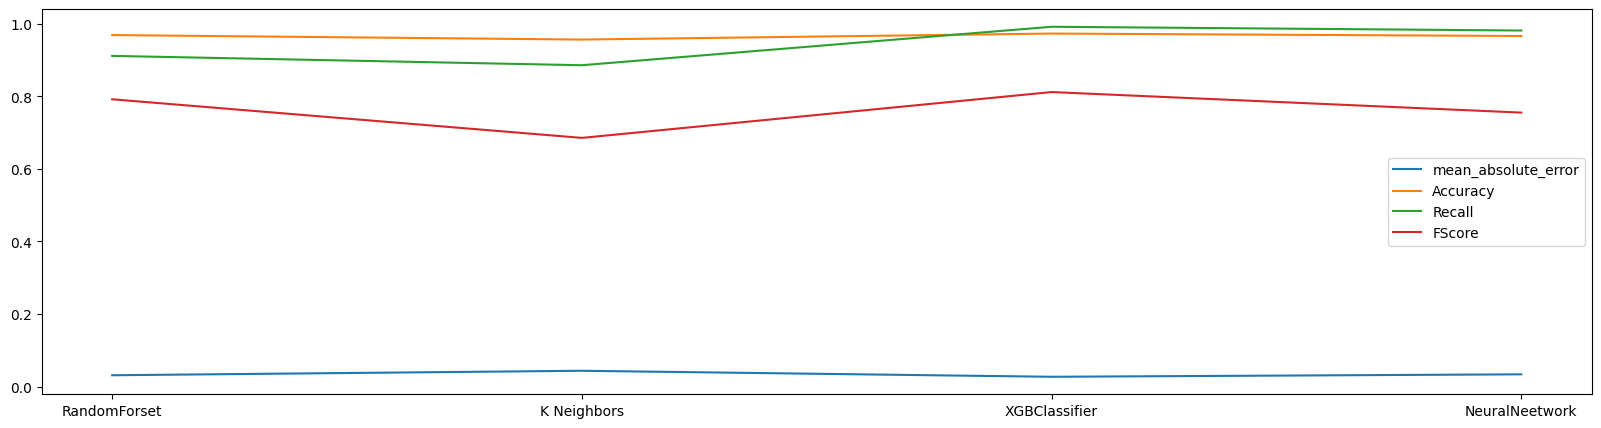

In [ ]:
import matplotlib.pyplot as plt
finalResult=pd.DataFrame({'Algorithm' : algo, 'MAE' : MAES , 'accuracy' : accuracy, 'recall' : recall, 'FScore' : fscore})
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(finalResult.Algorithm,MAES,label='mean_absolute_error')
plt.plot(finalResult.Algorithm,accuracy,label='Accuracy')
plt.plot(finalResult.Algorithm,recall,label='Recall')
plt.plot(finalResult.Algorithm,fscore,label='FScore')
plt.legend()
plt.show()


In [ ]:
min_accuracy = min(accuracy)
min_MAES = min(MAES)
min_recall = min(recall)
min_fscore = min(fscore)

best = {algo[accuracy.index(min_accuracy)] : min_accuracy, algo[MAES.index(min(MAES))] : min(MAES), algo[recall.index(min_recall)] : min_recall, algo[fscore.index(min_fscore)] : min_fscore}

print(algo[accuracy.index(min_accuracy)], min_accuracy, accuracy.index(min_accuracy))
print(algo[MAES.index(min(MAES))],min(MAES), MAES.index(min(MAES)))
print(algo[recall.index(min_recall)],min_recall, recall.index(min_recall))
print(algo[fscore.index(min_fscore)],min_fscore, fscore.index(min_fscore))

print('\nthe best model is:', min(best, key=best.get))

K Neighbors 0.9563 1
XGBClassifier 0.02715 2
K Neighbors 0.8855813953488372 1
K Neighbors 0.685385169186465 1

the best model is: XGBClassifier
